# Function

In [202]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plotCM(y_test, y_pred, labels, size=(5,5)):

    confusion_matrix = metrics.confusion_matrix(y_pred, y_test) # invert exis from test, pred to pred test
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = labels,)
    fig, ax = plt.subplots(figsize=size)
    cm_display.plot(ax=ax, xticks_rotation='vertical')
    plt.grid(False)
    # invert exis x,y
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

In [203]:
from sklearn.metrics import classification_report

def report(y_true, y_pred, labels) :
    print(classification_report(y_true, y_pred, target_names=labels))


In [204]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotBarChart(courses, y_train):
    values = np.unique(y_train, return_counts=True)[1]
    data = {'class' : courses, 'value' : values}
    data = pd.DataFrame(data, index=courses)
    print(data)
    
    ax = data.plot(kind='bar', figsize=(3,3), color='maroon', legend=False, rot=0)
    ax.set_xlabel("Class")
    ax.set_ylabel("Number of sample data")
    ax.grid(True, zorder=0)
    ax.set_axisbelow(True)

    plt.show()

# Pre-processing

<h4> โหลดชุดข้อมูล </h4>

In [205]:
import pandas as pd
import numpy as np

In [206]:
data_sets = pd.read_csv('./cow.csv')

In [207]:
data_sets.columns

Index(['surgery', 'age', 'hospital_number', 'temperature', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome Class', 'surgical_lesion', 'lesion'],
      dtype='object')

In [208]:
data_sets.shape

(299, 25)

In [209]:
data_sets['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

<h4> จัดการค่า NaN และ map input ให้เป็นตัวเลข </h4>

In [210]:
feture_cols = ['surgery', 
               'age', 
               'temperature', 
               'pulse', 
               'respiratory_rate', 
               'temp_of_extremities', 
               'peripheral_pulse', 
               'mucous_membrane', 
               'capillary_refill_time',
               'pain',
               'peristalsis',
               'abdominal_distention',
               'nasogastric_tube',
               'nasogastric_reflux',
               'rectal_exam_feces',
               'abdomen',
               'packed_cell_volume', 
               'total_protein', 
               'abdomo_appearance',
               'abdomo_protein',
               'surgical_lesion',
               'outcome Class']

In [211]:
df = data_sets[feture_cols].copy()
df.surgery = df.surgery.map({
    'no' : 0, 
    'yes' : 1
    })
df.age = df.age.map({
    'young' : 0, 
    'adult' : 1
    })
df.loc[df.temperature.isnull(), 'temperature'] = 37.8
df.loc[df.pulse.isnull(), 'pulse'] = int(np.random.randint(30, 40, size=1)) 
df.loc[df.respiratory_rate.isnull(), 'respiratory_rate'] = int(np.random.randint(8, 10, size=1)) 
df.temp_of_extremities = df.temp_of_extremities.map({
    'normal':0, 
    'warm':1, 
    'cool' : 2, 
    'cold' : 3,
    np.nan : 0,
    })
df.mucous_membrane = df.mucous_membrane.map({
    'normal_pink': 1, 
    'bright_pink': 2, 
    'pale_pink': 3,
    'pale_cyanotic':4, 
    'bright_red': 5, 
    'dark_cyanotic': 6,
    np.nan : 1
    })
df.peripheral_pulse = df.peripheral_pulse.map({
    'normal' : 1, 
    'increased' : 2, 
    'reduced' : 3, 
    'absent' : 4,
    np.nan : 1
    })
df.capillary_refill_time = df.capillary_refill_time.map({
    'less_3_sec' : 1,
    'more_3_sec' : 2,
    '3' : 2,
    np.nan : 1
})
df.pain = df.pain.map({
    'alert' : 1,
    'depressed' : 2,
    'extreme_pain' : 3,
    'mild_pain' : 4,
    'severe_pain' : 5,
    np.nan : 0
})
df.peristalsis = df.peristalsis.map({
    'hypermotile' : 1,
    'normal' : 2,
    'hypomotile' : 3,
    'absent' : 4,
    np.nan : 2
})
df.abdominal_distention = df.abdominal_distention.map({
    'none' : 1,
    'slight' : 2,
    'moderate' : 3,
    'severe' : 4,
    np.nan : 1
})
df.nasogastric_tube = df.nasogastric_tube.map({
    'none' : 1,
    'slight' : 2,
    'significant' : 3,
    np.nan : 1
})
df.nasogastric_reflux = df.nasogastric_reflux.map({
    'none' : 1,
    'more_1_liter' : 2,
    'less_1_liter' : 3,
    np.nan : 1
})
df.rectal_exam_feces = df.rectal_exam_feces.map({
    'normal' : 1,
    'increased' : 2,
    'decreased' : 3,
    'absent' : 4,
    np.nan : 1
})
df.abdomen = df.abdomen.map({
    'normal' : 1,
    'other' : 2,
    'firm' : 3,
    'distend_small' : 4,
    'distend_large' : 5,
    np.nan : 1
})
df.loc[df.packed_cell_volume.isnull(), 'packed_cell_volume'] = int(np.random.randint(30, 50, size=1)) 
df.loc[df.total_protein.isnull(), 'total_protein'] = float((7.5 - 6) * np.random.random_sample(1) + 6)
df.abdomo_appearance = df.abdomo_appearance.map({
    'clear' : 1,
    'cloudy' : 2,
    'serosanguious' : 3,
    np.nan : 1
})
df.loc[df.abdomo_protein.isnull(), 'abdomo_protein'] = 3
df.surgical_lesion = df.surgical_lesion.map({
    'yes' : 1,
    'no' : 2
})

# df = df.drop(df[df.isnull().sum(axis=1) > 0].index)

In [212]:
# check NaN
[df.isnull().sum(axis=0) > 0]

[surgery                  False
 age                      False
 temperature              False
 pulse                    False
 respiratory_rate         False
 temp_of_extremities      False
 peripheral_pulse         False
 mucous_membrane          False
 capillary_refill_time    False
 pain                     False
 peristalsis              False
 abdominal_distention     False
 nasogastric_tube         False
 nasogastric_reflux       False
 rectal_exam_feces        False
 abdomen                  False
 packed_cell_volume       False
 total_protein            False
 abdomo_appearance        False
 abdomo_protein           False
 surgical_lesion          False
 outcome Class            False
 dtype: bool]

In [213]:
# ดู feature ที่ไม่ได้นำมาใข้
[i for i in np.array(data_sets.columns) if i not in np.array(feture_cols)]

['hospital_number', 'nasogastric_reflux_ph', 'lesion']

In [214]:
df['outcome Class'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome Class, dtype: int64

In [215]:
X = df
y = X['outcome Class'].values
X = X.drop(['outcome Class'], axis=1)

In [216]:
classes = ['lived', 'died', 'euthanized']

In [217]:
y[y=='lived'] = 1
y[y=='died'] = 2
y[y=='euthanized'] = 3
y = y.astype('int')

# Feature selection for classification

## Numerical feature 

Use LDA

In [218]:
feature_num = ['temperature', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']
X_num_feature = X[feature_num].copy()

In [219]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_num_scale = sc.fit_transform(X_num_feature)

In [220]:
X_num_scale = pd.DataFrame(X_num_feature, columns=feature_num)

In [221]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_num_select = lda.fit_transform(X_num_scale, y)

In [222]:
print('Original numerical feature number:', X_num_feature.shape[1])
print('Reduced numerical feature number:', X_num_select.shape[1])

Original numerical feature number: 6
Reduced numerical feature number: 2


In [223]:
# X_num_select = pd.DataFrame(X_num_select, columns=lda.get_feature_names_out())

## Nominal feature

Use Chi square

In [224]:
feature_nom = [i for i in np.array(X.columns) if i not in np.array(feature_num)]
X_nom_feature = X[feature_nom].copy()

In [225]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_features = SelectKBest(chi2, k=10)
X_nom_select = chi2_features.fit_transform(X_nom_feature, y)

In [226]:
print('Original nominal feature number:', X_nom_feature.shape[1])
print('Reduced nominal feature number:', X_nom_select.shape[1])

Original nominal feature number: 15
Reduced nominal feature number: 10


In [227]:
# X_nom_select = pd.DataFrame(X_nom_select, columns=chi2_features.get_feature_names_out())

In [228]:
X_num_select.shape, X_nom_select.shape

((299, 2), (299, 10))

รวม Numerical feature และ nominal feature ที่ได้ทำการ feature selection แล้ว

In [229]:
X_select = np.concatenate([X_num_select, X_nom_select], axis=1)

In [230]:
X_select.shape

(299, 12)

# แยกข้อมูลฝึก/ทดสอบ

In [231]:
# split data
from sklearn.model_selection import train_test_split
# X_select || X
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.2)

# ตัวแปรควบคุม

In [232]:
from matplotlib import pyplot as plt

In [233]:
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 100)}
cv = 10

In [234]:
ls_model = {
    'model_cv' : []
}

In [235]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree

def bulidAndTrainModel(X_train, y_train) :
    dtree = DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree, param_grid, cv=cv, scoring='accuracy')
    dtree_gscv.fit(X_train, y_train)
    print('best params : {}'.format(dtree_gscv.best_params_))
    print('best score : {}'.format(dtree_gscv.best_score_))

    ls_model['model_cv'].append(dtree_gscv)

    return dtree_gscv.best_estimator_

# การทดลองที่ 1

สร้างโมเดล Decision Tree เรียนรู้ชุดข้อมูลฝึกที่ยังไม่ได้ sampling

                 class  value
lived            lived    140
died              died     61
euthanized  euthanized     38


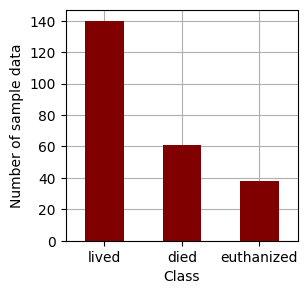

In [236]:
plotBarChart(classes, y_train)

In [237]:

model_1 = bulidAndTrainModel(X_train, y_train)

best params : {'criterion': 'entropy', 'max_depth': 3}
best score : 0.7159420289855072


[Text(0.5, 0.875, 'x[0] <= -0.13\nentropy = 1.377\nsamples = 239\nvalue = [140, 61, 38]'),
 Text(0.25, 0.625, 'x[1] <= 0.912\nentropy = 0.757\nsamples = 104\nvalue = [88, 5, 11]'),
 Text(0.125, 0.375, 'x[11] <= 1.5\nentropy = 0.575\nsamples = 78\nvalue = [70, 5, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.96\nsamples = 37\nvalue = [29, 5, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.375, 0.375, 'x[7] <= 1.5\nentropy = 0.89\nsamples = 26\nvalue = [18, 0, 8]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 20\nvalue = [12, 0, 8]'),
 Text(0.75, 0.625, 'x[1] <= 0.959\nentropy = 1.521\nsamples = 135\nvalue = [52, 56, 27]'),
 Text(0.625, 0.375, 'x[11] <= 1.5\nentropy = 1.441\nsamples = 121\nvalue = [48, 56, 17]'),
 Text(0.5625, 0.125, 'entropy = 1.357\nsamples = 89\nvalue = [25, 52, 12]'),
 Text(0.6875, 0.125, 'entropy = 1.136\nsamples = 32\nvalue = [23, 4, 5]'),
 Text(0.875, 0.375

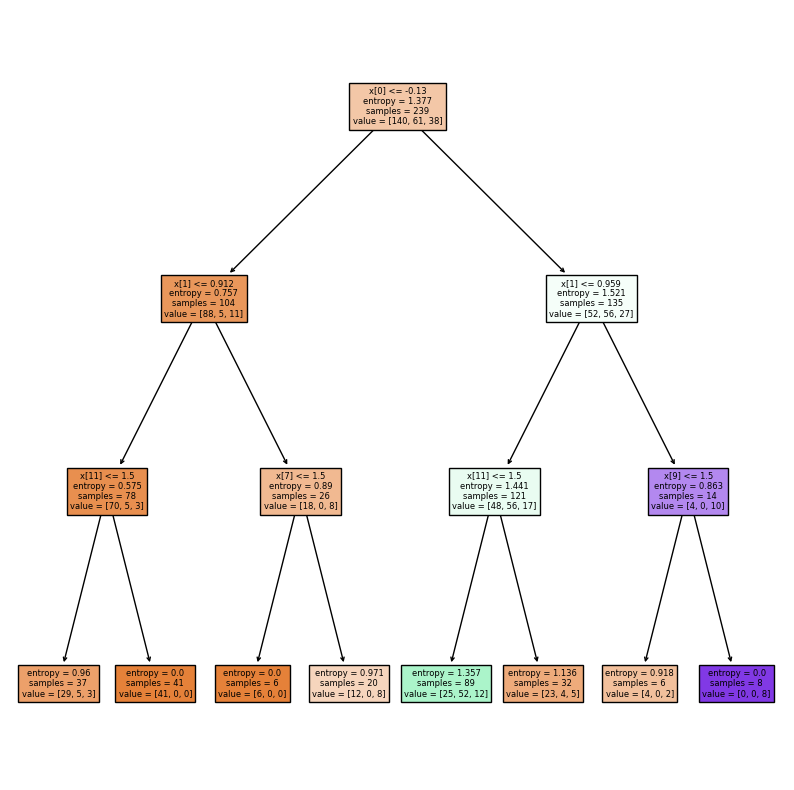

In [238]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(model_1, filled=True)

In [239]:
y_pred_1 = model_1.predict(X_test)
report(y_pred_1, y_test, classes)

              precision    recall  f1-score   support

       lived       0.84      0.74      0.79        43
        died       0.56      0.56      0.56        16
  euthanized       0.00      0.00      0.00         1

    accuracy                           0.68        60
   macro avg       0.47      0.44      0.45        60
weighted avg       0.75      0.68      0.72        60



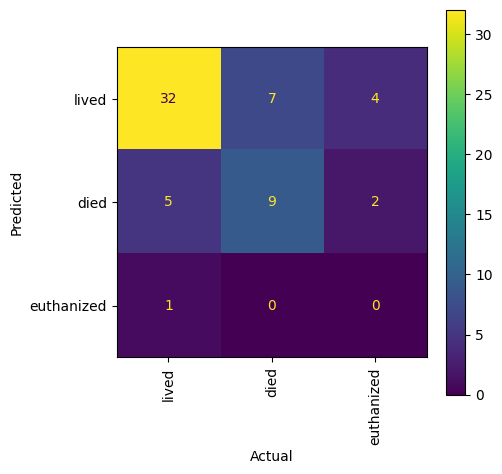

In [240]:
plotCM(y_test=y_test, y_pred=y_pred_1, labels=classes)

# การทดลองเพื่อแก้ปัญหา Imblance dataset

## Random sampling

In [241]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res_random,y_res_random = ros.fit_resample(X_train,y_train)

                 class  value
lived            lived    140
died              died    140
euthanized  euthanized    140


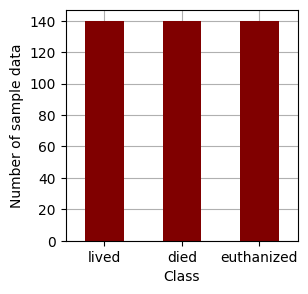

In [242]:
plotBarChart(classes, y_res_random)

In [243]:
model_randoms = bulidAndTrainModel(X_res_random, y_res_random)


best params : {'criterion': 'entropy', 'max_depth': 36}
best score : 0.9023809523809524


In [244]:
y_pred_res_rand = model_randoms.predict(X_test)
report(y_test, y_pred_res_rand, classes)

              precision    recall  f1-score   support

       lived       0.72      0.74      0.73        38
        died       0.40      0.25      0.31        16
  euthanized       0.27      0.50      0.35         6

    accuracy                           0.58        60
   macro avg       0.46      0.50      0.46        60
weighted avg       0.59      0.58      0.58        60



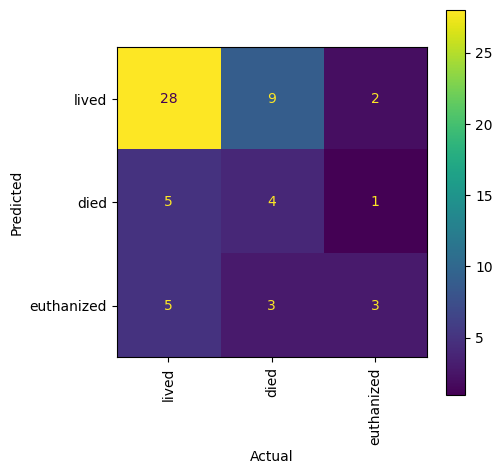

In [245]:
plotCM(y_test=y_test, y_pred=y_pred_res_rand, labels=classes)

## use oversampling using SMOTE to increase data for training set 

In [246]:
from imblearn .over_sampling import SMOTE

sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(X_train,y_train)

                 class  value
lived            lived    140
died              died    140
euthanized  euthanized    140


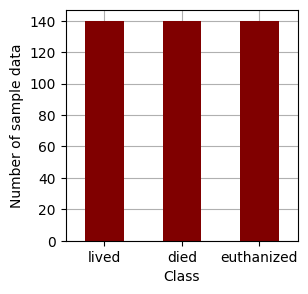

In [247]:
plotBarChart(classes, y_resampled_smote)

In [248]:
model_smote = bulidAndTrainModel(X_resampled_smote, y_resampled_smote)

best params : {'criterion': 'entropy', 'max_depth': 19}
best score : 0.7785714285714287


In [249]:
y_pred_smote = model_smote.predict(X_test)
report(y_pred_smote, y_test, classes)

              precision    recall  f1-score   support

       lived       0.74      0.76      0.75        37
        died       0.38      0.67      0.48         9
  euthanized       0.33      0.14      0.20        14

    accuracy                           0.60        60
   macro avg       0.48      0.52      0.48        60
weighted avg       0.59      0.60      0.58        60



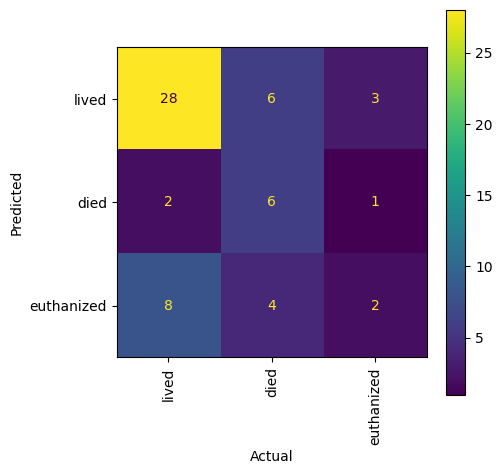

In [250]:
plotCM(y_test=y_test, y_pred=y_pred_smote, labels=classes)

## Tomek

In [251]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [252]:
tl = TomekLinks()
X_res_tomek, y_res_tomek = tl.fit_resample(X_train, y_train)

                 class  value
lived            lived    125
died              died     54
euthanized  euthanized     38


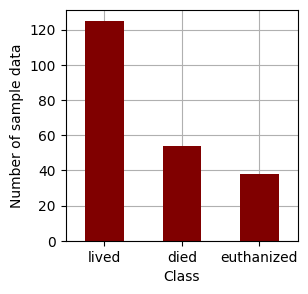

In [253]:
plotBarChart(classes, y_res_tomek)

In [254]:
model_tomek = bulidAndTrainModel(X_res_tomek, y_res_tomek)

best params : {'criterion': 'entropy', 'max_depth': 3}
best score : 0.6504329004329005


In [255]:
y_pred_tomek = model_tomek.predict(X_test)
report(y_test, y_pred_tomek, classes)

              precision    recall  f1-score   support

       lived       0.78      0.84      0.81        38
        died       0.69      0.69      0.69        16
  euthanized       0.00      0.00      0.00         6

    accuracy                           0.72        60
   macro avg       0.49      0.51      0.50        60
weighted avg       0.68      0.72      0.70        60



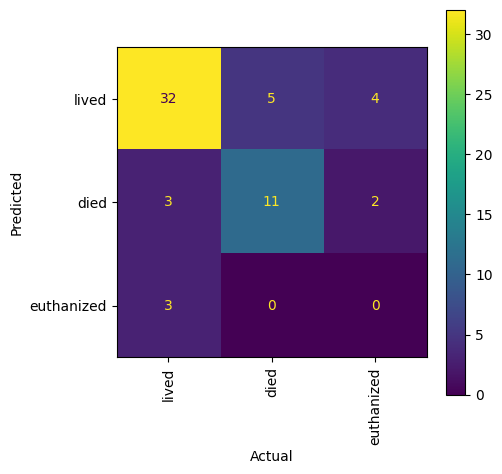

In [256]:
plotCM(y_test, y_pred_tomek, classes)

## ADASYN

In [257]:
from imblearn.over_sampling import ADASYN

In [258]:
ad = ADASYN()
X_res_adasyn, y_res_adasyn = ad.fit_resample(X_train, y_train)

                 class  value
lived            lived    140
died              died    150
euthanized  euthanized    139


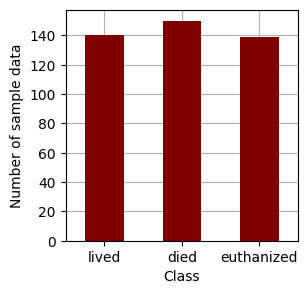

In [259]:
plotBarChart(classes, y_res_adasyn)

In [260]:
model_adasyn = bulidAndTrainModel(X_res_adasyn, y_res_adasyn)

best params : {'criterion': 'gini', 'max_depth': 40}
best score : 0.7858250276854928


In [261]:
y_pred_adasyn = model_adasyn.predict(X_test)
report(y_test, y_pred_adasyn, classes)

              precision    recall  f1-score   support

       lived       0.82      0.74      0.78        38
        died       0.56      0.56      0.56        16
  euthanized       0.20      0.33      0.25         6

    accuracy                           0.65        60
   macro avg       0.53      0.54      0.53        60
weighted avg       0.69      0.65      0.67        60



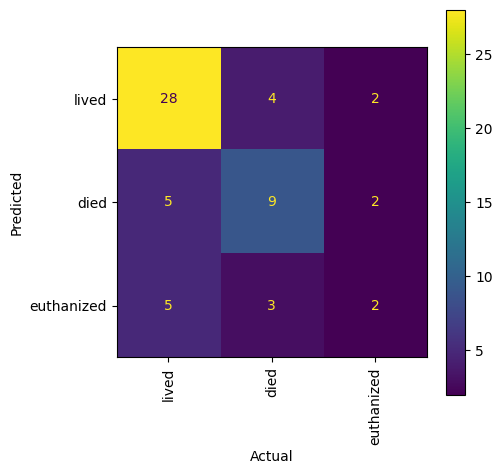

In [262]:
plotCM(y_test, y_pred_adasyn, classes)

# สรุปผลการทดลอง

In [263]:
index = ['On sampling', 'Random', 'SMOT', 'TOMEK', 'ADASYN']

ls_reslut_pred = [
    y_pred_1,
    y_pred_res_rand,
    y_pred_smote,
    y_pred_tomek,
    y_pred_adasyn ,
]

In [264]:
from sklearn import metrics

# accuarcy
accuarcy = []
for pred in ls_reslut_pred :
    accuarcy.append(metrics.accuracy_score(y_test, pred))
    
# recall
recall = []
for pred in ls_reslut_pred :
    recall.append(metrics.recall_score(y_test, pred, average='weighted'))

# F1
f1 = []
for pred in ls_reslut_pred :
    f1.append(metrics.f1_score(y_test, pred, average='weighted'))
    
# precision
precision = []
for pred in ls_reslut_pred :
    precision.append(metrics.precision_score(y_test, pred, average='weighted'))

เปรียบเทียบประสิทธิภาพโมเดลระหว่างชุดข้อมูงเรียนรู้และชุดข้อมูลทดสอบ

In [265]:
acc_train_socre = []
for g_cv in ls_model['model_cv']:
    acc_train_socre.append(g_cv.best_score_)
    
score_train_test = pd.DataFrame({
    'train accuracy' : acc_train_socre,
    'test accuracy' : accuarcy
}, index=index)

score_train_test

,train accuracy,test accuracy
On sampling,0.715942,0.683333
Random,0.902381,0.583333
SMOT,0.778571,0.600000
TOMEK,0.650433,0.716667
ADASYN,0.785825,0.650000


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the model performance between\n the learning data set and the test data set.'}>>

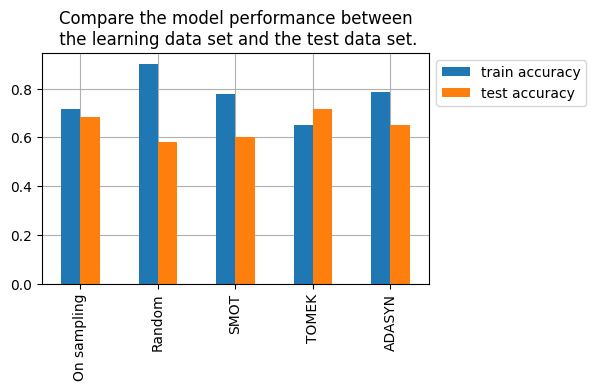

In [266]:
ax = score_train_test.plot(kind='bar', figsize=(5,3))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the model performance between\n the learning data set and the test data set.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot

เปรียบเทียบประสิทธิภาพของโมเดลทั้งหมด

In [270]:
data_scores = pd.DataFrame(
    data={
    'accuarcy' : accuarcy,
    'recall' : recall,
    'F1' : f1,
    'precision' : precision
    }, index=index)

data_scores

,accuarcy,recall,F1,precision
On sampling,0.683333,0.683333,0.650412,0.621318
Random,0.583333,0.583333,0.577951,0.588640
SMOT,0.600000,0.600000,0.620889,0.671343
TOMEK,0.716667,0.716667,0.696414,0.677642
ADASYN,0.650000,0.650000,0.667593,0.691569


<bound method Axes.plot of <AxesSubplot: title={'center': 'Compare the performance of all models.'}>>

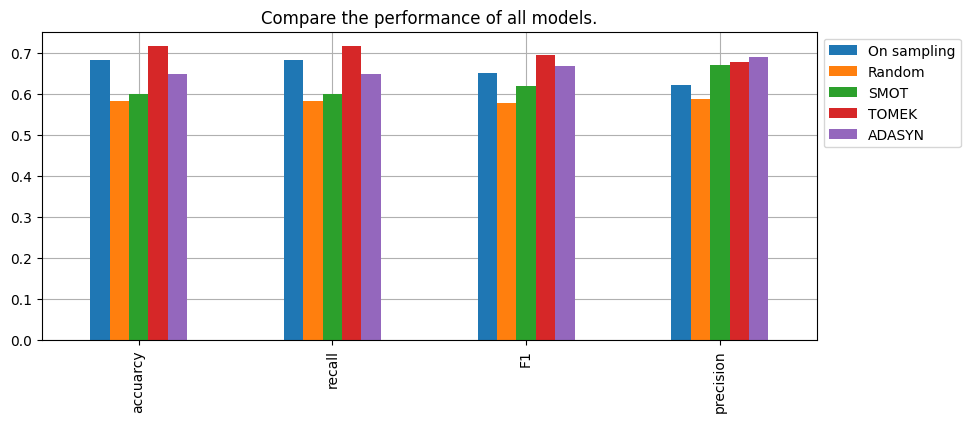

In [268]:
# performance บน test set
ax = data_scores.T.plot(kind='bar', figsize=(10,4))
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.set_title('Compare the performance of all models.')
ax.grid(True, zorder=0)
ax.set_axisbelow(True)
ax.plot